# Titanic Kaggle Competition

This my first attemp with a Kaggle competition.  I will create and train different machine learning models for predicting the Titanic survivals.

I will be creating a Decision Tree as the first model to try to predict the survivors, and after that i will create other models, so we can compare the results.

## Import the libraries needed: Pandas, Numpy and SciKit

In [71]:
# Import the Pandas library
import pandas as pd

# Import the numpy library
import numpy as np

# Import 'tree' from scikit-learn library
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline


## Load the train and test datasets, available in Amazon S3

In [72]:
# Load the train and test datasets to create two DataFrames
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)


test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

## Print the datasets heads and dataset keys to have a basic understanding of the data

In [73]:
#Print the `head` of the train and test dataframes
print(train.head())
print(test.head())
print(test.keys())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

## Lets visualize the histrograms of the Train Data

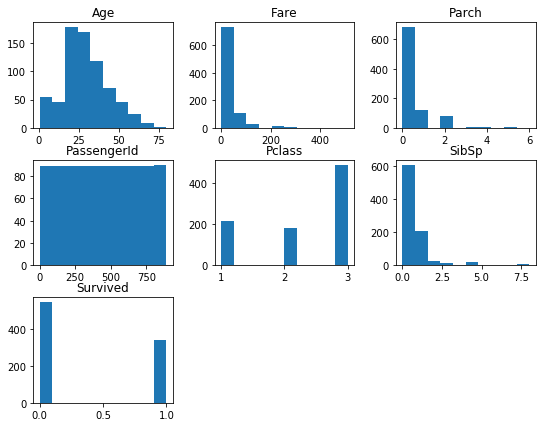

In [74]:
train.hist(bins=10,figsize=(9,7),grid=False);

## And show if some values are missing from the features

In [75]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


From a dataset analysis, I conclude that "Age" is missing in some observations. So i have to fill the missing values.  I took the decision to fill the missing values with the mean of the column:


## Lets impute the "Age" feature with the mean

In [76]:
#Impute the "Age" feature with the mean
train["Age"]=train["Age"].fillna(train["Age"].mean())

## Models dont like strings as values, so for the "Sex" feature i decide to replace 'female' with a 1, and 'male' with a 0

In [77]:
# Convert the male and female groups to integer form
train["Sex"] = train["Sex"].map({'female': 1, 'male': 0})

## Now that i have the train dataset ready (no missing values and "Sex" replaced with numbers i can begin with the training of the chosen model.
## My first model will be using only four features from the DataSet: "Pclass", "Sex", "Age" and "Fare". 
Initial step is the create specific numpy arrays for the features values, and for the outcome values.

In [78]:
# Create the target and features numpy arrays: target, features_one
target = train["Survived"].values
features = train[["Pclass", "Sex", "Age", "Fare"]].values

Second step is to create a Decision Tree model, and train it.

In [79]:
# Fit your first decision tree: my_tree
my_tree = tree.DecisionTreeClassifier()
my_tree = my_tree.fit(features, target)

Third step is to check the most important features for the model and the score

In [80]:
# Look at the importance and score of the included features
print(my_tree.feature_importances_)
print(my_tree.score(features, target))

[ 0.11920293  0.31117584  0.26716226  0.30245898]
0.979797979798


We can conclude that "Sex" and "Fare" are the most important feature for our model (0.3111 and 0.3089) and that the score of the model on the train data is 0.9797

## Now we have to use our trained model with new data, in order to predict the survivors

So we have to prepare the Test data in a similar way as what we did with the training data.

First step is to impute "Age" and replace 'female' with 1 and 'male' with 0

In [81]:
# Convert the male and female groups to integer form
test["Sex"] = test["Sex"].map({'female': 1, 'male': 0})

#Impute the "Age" feature with the mean
test["Age"]=test["Age"].fillna(test["Age"].mean())

When the train dataset was used, the "Fare" feature values were complete and no NaN were present, but on the test data we have to impute some values. Once again we will use the mean of the column.  

In [82]:
#Impute the "Fare" feature with the mean
test["Fare"]=test["Fare"].fillna(test["Fare"].mean())

## In our model we are using only four features from the DataSet: "Pclass", "Sex", "Age" and "Fare", so we have to extract those features from the Test dataset, and create a numpy vector.

In [83]:
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values

## And with the test data we have to predict if a passanger was a survivor or not:

In [84]:
# Make your prediction using the test set
my_prediction = my_tree.predict(test_features)

## And once the prediction are made by the model, i need to generate a CSV file to send to Kaggle. The file will have just two columns: "PassengerId" and "Survived"

In [85]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("DecisionTree.csv", index_label = ["PassengerId"])


      Survived
892          0
893          0
894          1
895          1
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          1
906          1
907          1
908          0
909          1
910          1
911          0
912          0
913          1
914          1
915          1
916          1
917          0
918          1
919          1
920          1
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         0
1297         0
1298         0
1299         0
1300         0
1301         1
1302         0
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


One you have the CSV file you have to upload the file to Kaggle and wait for the score.
This first attempt is not the best model, but it is simple to understand and helps to understand how the Kaggle competitions works.

## We now can try other algorithms to try to predict the survivors.  Lets try with K Neighbors
 First with only 1 neighbor
 

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features, target)
knn.score(features, target)

# Make your prediction using the test set
my_prediction = knn.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("K1Neighbors.csv", index_label = ["PassengerId"])


      Survived
892          0
893          0
894          1
895          1
896          0
897          0
898          0
899          1
900          1
901          0
902          0
903          0
904          1
905          0
906          0
907          1
908          0
909          0
910          1
911          0
912          1
913          1
914          1
915          1
916          1
917          0
918          1
919          1
920          1
921          0
...        ...
1280         0
1281         0
1282         1
1283         1
1284         1
1285         0
1286         0
1287         1
1288         1
1289         0
1290         0
1291         0
1292         1
1293         1
1294         1
1295         0
1296         1
1297         0
1298         0
1299         1
1300         0
1301         1
1302         0
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


Now with the 3 nearest neighbors


In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features, target)
knn.score(features, target)

# Make your prediction using the test set
my_prediction = knn.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("K3Neighbors.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          1
895          1
896          0
897          0
898          0
899          1
900          0
901          1
902          0
903          0
904          1
905          0
906          0
907          1
908          0
909          0
910          1
911          0
912          0
913          0
914          0
915          1
916          1
917          0
918          1
919          0
920          0
921          1
...        ...
1280         0
1281         1
1282         1
1283         0
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         0
1293         1
1294         1
1295         0
1296         1
1297         0
1298         0
1299         1
1300         1
1301         1
1302         1
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         1

[418 rows x 1 columns]


## Now lets try the Logistic  Regression algorithm. Despite its name is a Classification Algorithm
First with default parameters

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(features, target)
lr.fit(features, target)
lr.score(features, target)

# Make your prediction using the test set
my_prediction = lr.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("LinearRegressionC=1.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          0
895          0
896          1
897          0
898          1
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          1
911          0
912          0
913          0
914          1
915          1
916          1
917          0
918          1
919          0
920          0
921          0
...        ...
1280         0
1281         0
1282         1
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         0
1297         0
1298         0
1299         0
1300         1
1301         1
1302         1
1303         1
1304         1
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


## Now with parameter C=100 :

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100).fit(features, target)
lr.fit(features, target)
lr.score(features, target)

# Make your prediction using the test set
my_prediction = lr.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("LinearRegressionC=100.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          0
895          0
896          1
897          0
898          1
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          1
911          0
912          0
913          0
914          1
915          1
916          1
917          0
918          1
919          0
920          0
921          0
...        ...
1280         0
1281         0
1282         1
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         0
1297         0
1298         0
1299         0
1300         1
1301         1
1302         1
1303         1
1304         1
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


## Now lets try the LinearSVC Algorithm:

In [90]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC().fit(features, target)
linear_svc.fit(features, target)
linear_svc.score(features, target)

# Make your prediction using the test set
my_prediction = linear_svc.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("LinearSVC.csv", index_label = ["PassengerId"])

      Survived
892          0
893          1
894          0
895          0
896          1
897          0
898          1
899          0
900          1
901          0
902          0
903          1
904          1
905          0
906          1
907          1
908          0
909          0
910          1
911          1
912          1
913          0
914          1
915          1
916          1
917          0
918          1
919          0
920          1
921          0
...        ...
1280         0
1281         0
1282         1
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         1
1297         0
1298         0
1299         1
1300         1
1301         1
1302         1
1303         1
1304         1
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


## Now lets try a Random Forest
With 5 trees.  random_state=2 is just a value to generate always the same random trees, so your trees will be the same as mine

In [91]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(features,target)
forest.score(features, target)

# Make your prediction using the test set
my_prediction = forest.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("RandomForest5Trees.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          0
895          0
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          1
910          1
911          0
912          0
913          0
914          1
915          1
916          1
917          0
918          1
919          1
920          1
921          0
...        ...
1280         0
1281         0
1282         1
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         0
1297         0
1298         0
1299         0
1300         0
1301         1
1302         0
1303         1
1304         1
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


## Now lets try with a Gradient Boosted Tree (Gradient Boosting Machines)

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(features, target)
gbrt.score(features, target)

# Make your prediction using the test set
my_prediction = gbrt.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("GradientBoostedTree.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          0
895          0
896          0
897          0
898          1
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          1
911          1
912          0
913          0
914          1
915          0
916          1
917          0
918          1
919          0
920          1
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         0
1296         0
1297         0
1298         0
1299         0
1300         0
1301         1
1302         0
1303         1
1304         1
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


In [93]:
## Now lets try with a SVC Algorithm

In [94]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(features,target)
svc.score(features, target)

# Make your prediction using the test set
my_prediction = svc.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("SVC.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          1
895          0
896          0
897          0
898          1
899          1
900          1
901          1
902          0
903          0
904          1
905          0
906          0
907          1
908          0
909          0
910          1
911          0
912          1
913          1
914          1
915          1
916          1
917          0
918          1
919          0
920          1
921          0
...        ...
1280         0
1281         1
1282         1
1283         1
1284         1
1285         0
1286         0
1287         1
1288         0
1289         0
1290         0
1291         0
1292         1
1293         1
1294         1
1295         0
1296         0
1297         0
1298         0
1299         1
1300         1
1301         1
1302         1
1303         1
1304         1
1305         0
1306         1
1307         0
1308         0
1309         1

[418 rows x 1 columns]


## And now lets try a Multilayer Perceptron Neural Network with default parameters


In [95]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(features,target)
mlp.score(features,target)

# Make your prediction using the test set
my_prediction = mlp.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("mlp.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          0
895          0
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          1
911          0
912          0
913          0
914          1
915          0
916          1
917          0
918          1
919          0
920          0
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         0
1296         0
1297         0
1298         0
1299         0
1300         0
1301         1
1302         0
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


## Now let tweak a little bit the parameters. I define max_iter=1000 and alpha=1

In [96]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, alpha=1,random_state=0)
mlp.fit(features,target)
mlp.score(features,target)

# Make your prediction using the test set
my_prediction = mlp.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)
# Write your solution to a csv file
my_solution.to_csv("mlpMaxIteration&Alpha.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          0
895          0
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          0
911          0
912          0
913          0
914          1
915          1
916          1
917          0
918          1
919          0
920          0
921          0
...        ...
1280         0
1281         0
1282         1
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         0
1296         0
1297         0
1298         0
1299         1
1300         0
1301         1
1302         0
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]
